## Pyber Homework - Week 5
### Observations:
#### 1. Average fares per ride is higher in rural areas and the lowest in the urban areas.(See graph below)
#### 2. 2.6% of drivers provide rides within rural areas with a total of 6.8% of total fares. (due to higher fares)
#### 3. Median fares by group = 35.12(Rural), 30.90 (Suburban) and 24.48(Urban)
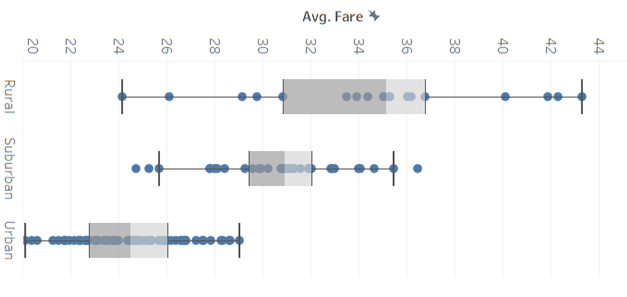

In [1]:
import pandas as pd
import numpy as np
import os
os.getcwd()
import glob

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from pylab import *
from scipy import *


glob.glob('*csv')
file = "city_data.csv"
city_df = pd.read_csv(file)

file = "ride_data.csv"
ride_df = pd.read_csv(file)

In [2]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
#Average Fare ($) Per City
grouped_city_fare = ride_df.groupby(['city'],as_index=False).mean()
grouped_city_fare.drop(grouped_city_fare.columns[[2]], axis=1, inplace=True)

In [4]:
#Total Number of Rides Per City
grouped_city_rides = ride_df.groupby(['city'],as_index=False).count()
grouped_city_rides.drop(grouped_city_rides.columns[[1,2]], axis=1, inplace=True)

In [5]:
#Total Number of Drivers Per City
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
#City Type (Urban, Suburban, Rural)
grouped_city_type = city_df.groupby(['type','city'],as_index=False).sum()

In [7]:
pyber = pd.merge(grouped_city_type,
                 grouped_city_fare,
                 on='city')
pyber2=pd.merge(pyber,
                 grouped_city_rides,
                 on='city')


In [8]:
Rural = pyber2[pyber2['type'] =='Rural']
Suburban = pyber2[pyber2['type'] =='Suburban']
Urban = pyber2[pyber2['type'] =='Urban']

grouped_rural = Rural.groupby(['type'],as_index=False).sum()
grouped_rural.drop(grouped_rural.columns[[1,2,3]], axis=1, inplace=True)

grouped_Suburban = Suburban.groupby(['type'],as_index=False).sum()
grouped_Suburban.drop(grouped_Suburban.columns[[1,2,3]], axis=1, inplace=True)

grouped_Urban = Urban.groupby(['type'],as_index=False).sum()
grouped_Urban.drop(grouped_Urban.columns[[1,2,3]], axis=1, inplace=True)


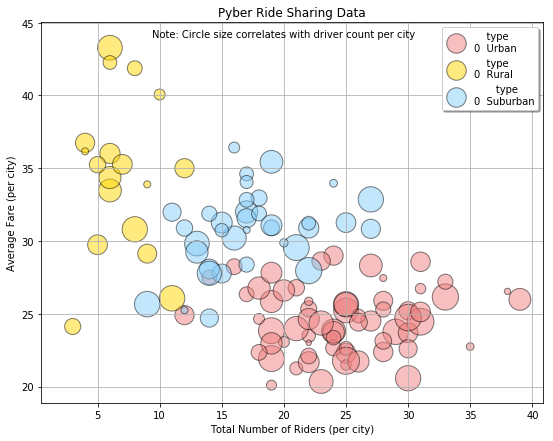

In [9]:
fig = plt.figure()
txt="Note: Circle size correlates with driver count per city"
ax1 = fig.add_subplot(111)

ax1.scatter(Urban.ride_id, Urban.fare,s=Urban.driver_count*10, c='lightcoral', alpha = 0.5,edgecolors="black",)
ax1.scatter(Rural.ride_id, Rural.fare,s=Urban.driver_count*10, c='gold', alpha = 0.5,edgecolors="black",)
ax1.scatter(Suburban.ride_id, Suburban.fare, s=Urban.driver_count*10, c='lightskyblue', alpha = 0.5,edgecolors="black",)

plt.xlabel("Total Number of Riders (per city)")
plt.ylabel("Average Fare (per city)")
plt.title("Pyber Ride Sharing Data")


#plt.legend((list(color_result)), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.legend((grouped_Urban,grouped_rural,grouped_Suburban),loc='upper right', shadow=True)
plt.grid(True)

# resize the figure to match the aspect ratio of the Axes    
fig.set_size_inches(9, 7, forward=True)
fig.text(0.5, 0.85, txt, ha='center')

#pylab.rcParams['figure.figsize'] = (14,)


plt.show()

In [10]:
#Total Fare ($) Per City
grouped_city_faresum = ride_df.groupby(['city'],as_index=False).sum()
grouped_city_faresum.drop(grouped_city_faresum.columns[[2]], axis=1, inplace=True)
grouped_city_faresum

cityfare = pd.merge(grouped_city_faresum,
                 city_df,
                 on='city')
cityfare
grouped_type_faresum = cityfare.groupby(['type'],as_index=False).sum()
grouped_type_faresum.drop(grouped_type_faresum.columns[[2]], axis=1, inplace=True)

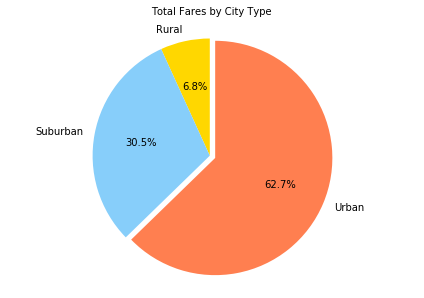

In [11]:
#Total Fares by City Type

txt2="Total Fares by City Type"

colors = ['gold','lightskyblue','coral']
# Create a pie chart
plt.pie(grouped_type_faresum['fare'],
    # with the labels being officer names
    labels=grouped_type_faresum['type'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
# View the plot drop above
plt.axis('equal')
plt.text(0.01, 1.2, txt2, ha='center')
# View the plot

plt.tight_layout()
plt.show()

#% of  Total Fares by City Type

In [12]:
#Total Rides ($) Per City
grouped_city_ridecount = ride_df.groupby(['city'],as_index=False).count()
#grouped_city_ridecount.drop(grouped_city_ridecount.columns[[2]], axis=1, inplace=True)

cityrides = pd.merge(grouped_city_ridecount,
                 city_df,
                 on='city')
cityrides
grouped_type_cityrides = cityrides.groupby(['type'],as_index=False).sum()
#grouped_type_faresum.drop(grouped_type_faresum.columns[[2]], axis=1, inplace=True)


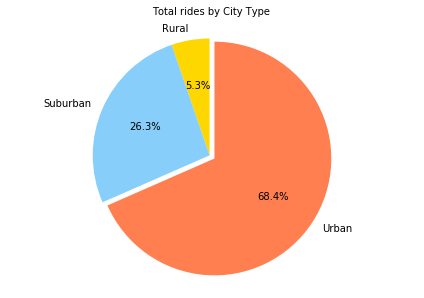

In [13]:
#Total rides by City Type

txt3="Total rides by City Type"
colors = ['gold','lightskyblue','coral']
# Create a pie chart
plt.pie(grouped_type_cityrides['fare'],
    # with the labels being officer names
    labels=grouped_type_faresum['type'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
# View the plot drop above
plt.axis('equal')
plt.text(0.01, 1.2, txt3, ha='center')

# View the plot
plt.tight_layout()
plt.show()

#% of  Total Rides by City Type

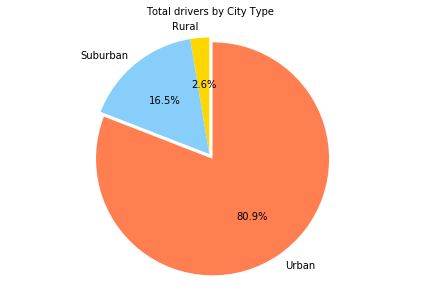

In [14]:
#Total drivers by City Type
txt4="Total drivers by City Type"

colors = ['gold','lightskyblue','coral']
# Create a pie chart
plt.pie(grouped_type_cityrides['driver_count'],
    # with the labels being officer names
    labels=grouped_type_faresum['type'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
# View the plot drop above
plt.axis('equal')
plt.text(0.01, 1.2, txt4, ha='center')

# View the plot
plt.tight_layout()
plt.show()

#% of  Total Rides by City Type